In [1]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

## Loading and Preprocessing Crowdfunding Data

Load the `crowdfunding-data.csv` in a pandas DataFrame called `df_crowdfunding`.

In [2]:
# Load data
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_2/datasets/crowdfunding-data.csv"
df_crowdfunding = pd.read_csv(file_path)
df_crowdfunding.head()

,goal,pledged,backers_count,country,staff_pick,spotlight,category,days_active,outcome
0,100,0,0,3,0,0,0,17,0
1,1400,14560,158,0,0,1,1,27,1
2,108400,142523,1425,4,0,0,2,20,1
3,4200,2477,24,0,0,0,1,40,0
4,7600,5265,53,0,0,0,3,4,0


Define the features set, by copying the `df_crowdfunding` DataFrame and dropping the `outcome` column.

In [3]:
# Define features set
X = df_crowdfunding.copy()
X.drop("outcome", axis=1, inplace=True)
X.head()

,goal,pledged,backers_count,country,staff_pick,spotlight,category,days_active
0,100,0,0,3,0,0,0,17
1,1400,14560,158,0,0,1,1,27
2,108400,142523,1425,4,0,0,2,20
3,4200,2477,24,0,0,0,1,40
4,7600,5265,53,0,0,0,3,4


Create the target vector by assigning the values of the `outcome` column from the `df_crowdfunding` DataFrame.

In [4]:
# Define target vector
y = df_crowdfunding["outcome"].values.reshape(-1, 1)
y[:5]

array([[0],
       [1],
       [1],
       [0],
       [0]])

Split the data into training and testing sets.

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_test` DataFrames should be scaled.

In [6]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [7]:
# Fit the StandardScaler with the training data
X_scaler = scaler.fit(X_train)

In [8]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree Model

Once data is scaled, create a decision tree instance and train it with the training data (`X_train_scaled` and `y_train`).

In [9]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [10]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

Validate the trained model, by predicting crowdfunding success using the testing data (`X_test_scaled`).

In [11]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the accuracy score.

In [12]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9540636042402827


## Visualizing the Decision Tree

In this section, you should create a visual representation of the decision tree using `pydotplus`. Show the graph on the notebook, and also save it in `PDF` and `PNG` formats.

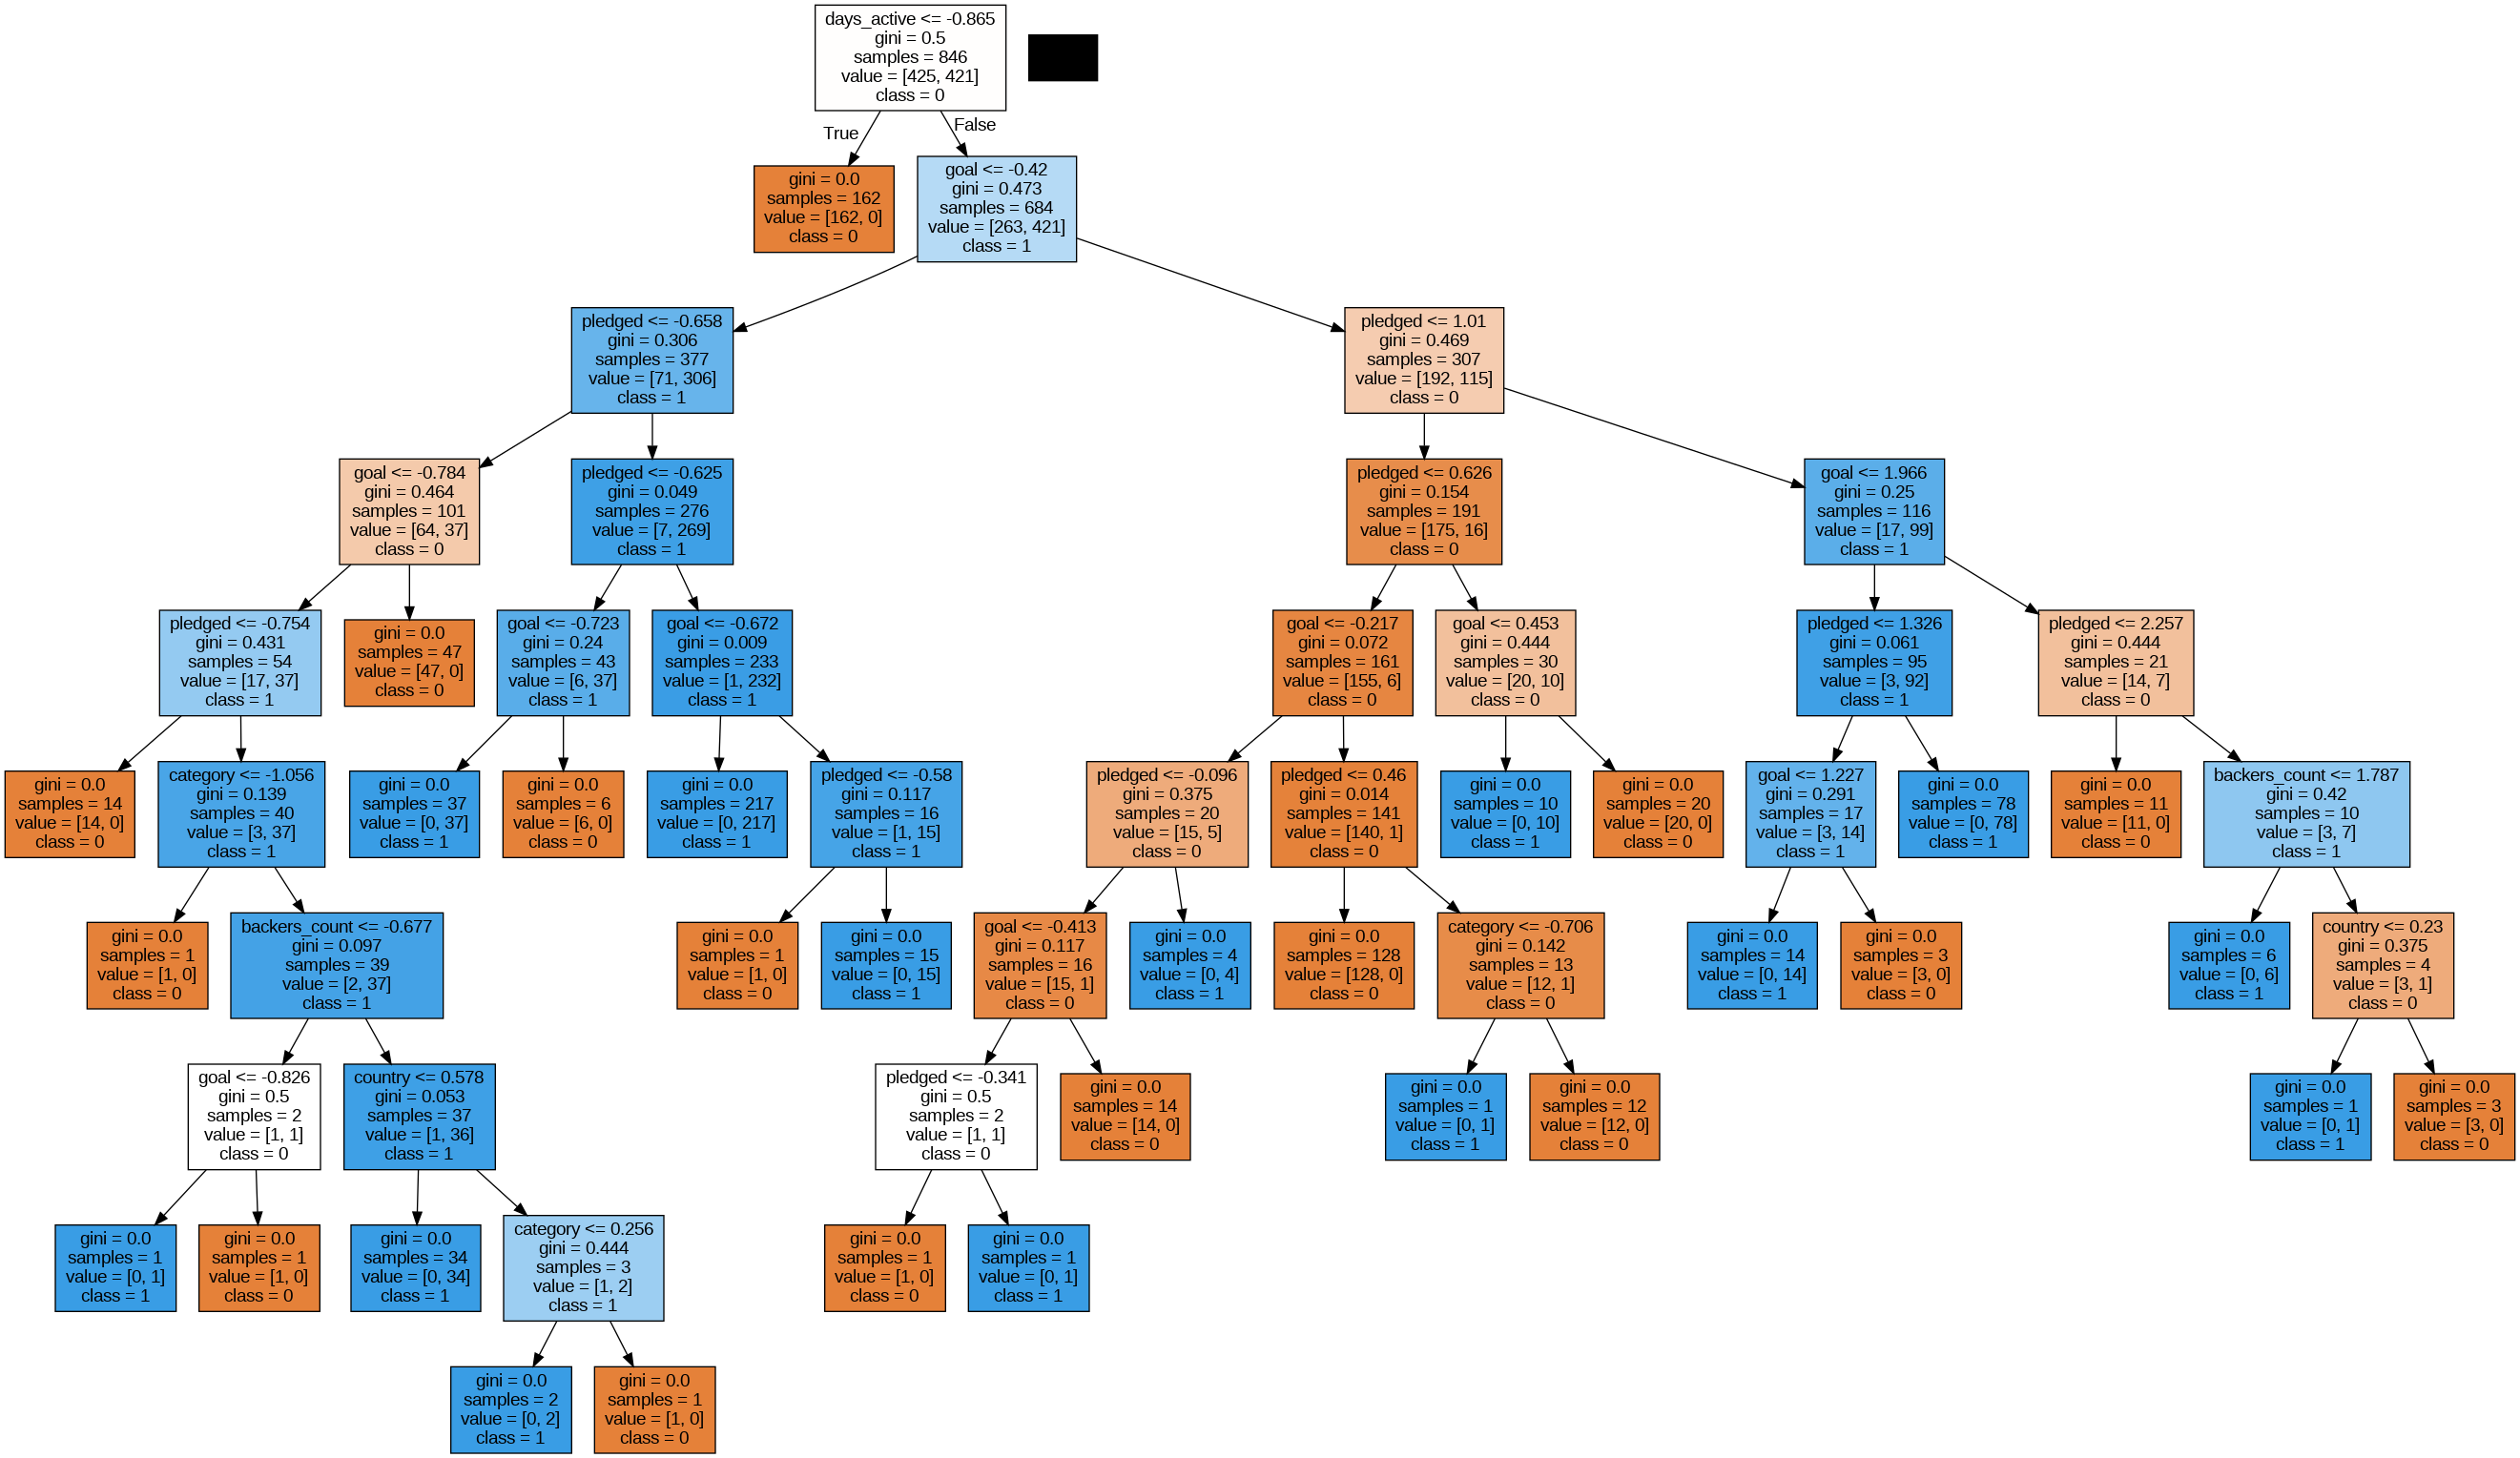

In [13]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [14]:
# When saving the image, graph.write_<file_type>() must take a string object

# Save the tree as PDF
file_path = "crowdfunding_tree.pdf"
graph.write_pdf(file_path)

# Save the tree as PNG
file_path = "crowdfunding_tree.png"
graph.write_png(file_path)


True